In [45]:
import xarray as xr  
import pandas as pd  
import glob 
import os 
import numpy as np 
import matplotlib.pyplot as plt 

# A notebook to analyse results in the results/ dir. These results come from a compression experiment comparing wavelet and non wavelet compression methods on a 2D electronic potential dataset from the GYSELA code. 

In [46]:
from xarray_utils import csv_dims_to_lists, xarray_results_dataset

In [47]:
_dir = os.getcwd() 

In [48]:
results_dir = _dir + "/results"
phi_2D_results = glob.glob(results_dir + '/rec_Phi2D_*')
phi_2D_results.sort() 

In [49]:
images_dir = _dir +'/images/'

In [50]:
xarray_datasets = [] 

for rec_dir in phi_2D_results:
    methods, data, diags = csv_dims_to_lists(rec_dir + '/') 
    ds = xarray_results_dataset(rec_dir + '/', data_dimension=2) 
    xarray_datasets.append(ds) 


In [51]:
from xarray_utils import rth_slice_dataset, thphi_slice_dataset 

In [52]:
rth_ds = []
thphi_ds = [] 

for ds in xarray_datasets:
    rth_ds.append(rth_slice_dataset(ds)) 
    thphi_ds.append(thphi_slice_dataset(ds)) 

In [53]:
rth_full_ds = xr.concat(rth_ds, dim='data') 
thphi_full_ds = xr.concat(thphi_ds, dim='data') 

# Analysis of Phi_rth

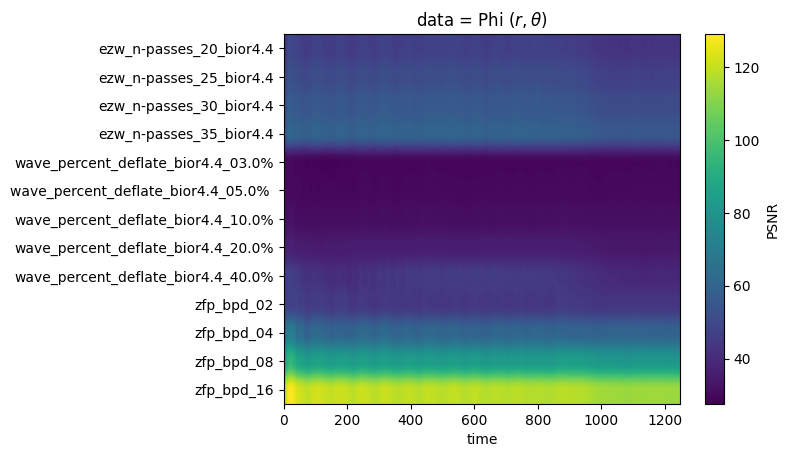

In [54]:
to_plot = rth_full_ds.psnr.mean(dim='diag').values
fig, ax = plt.subplots(1,1)
im = ax.imshow(to_plot, aspect='auto')
ax.set_title(r'data = Phi $(r, \theta)$')
ax.set_xlabel('time')
ax.set_yticks(range(13)) 
ax.set_yticklabels(rth_full_ds.coords['method'].values)
cbar = fig.colorbar(im)
cbar.set_label("PSNR")  

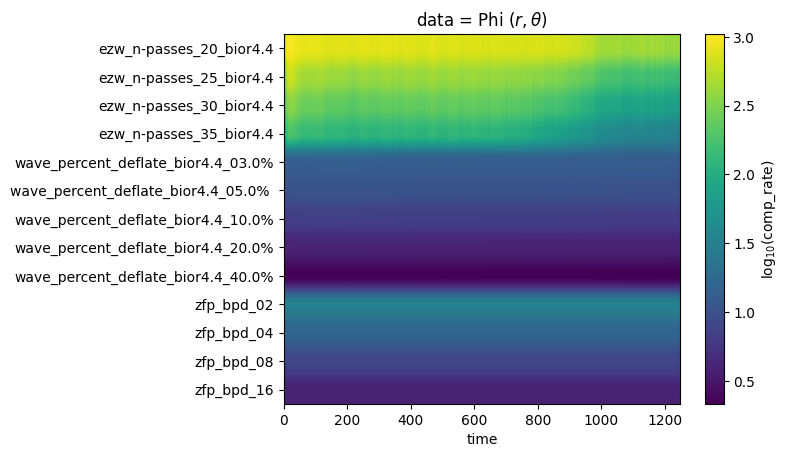

In [55]:
to_plot = np.log10(rth_full_ds.comp_rate.values)
fig, ax = plt.subplots(1,1)
im = ax.imshow(to_plot, aspect='auto')
ax.set_title(r'data = Phi $(r, \theta)$')
ax.set_xlabel('time')
ax.set_yticks(range(13)) 
ax.set_yticklabels(rth_full_ds.coords['method'].values)
cbar = fig.colorbar(im)
cbar.set_label(r'$\log_{10}$(comp_rate)')  

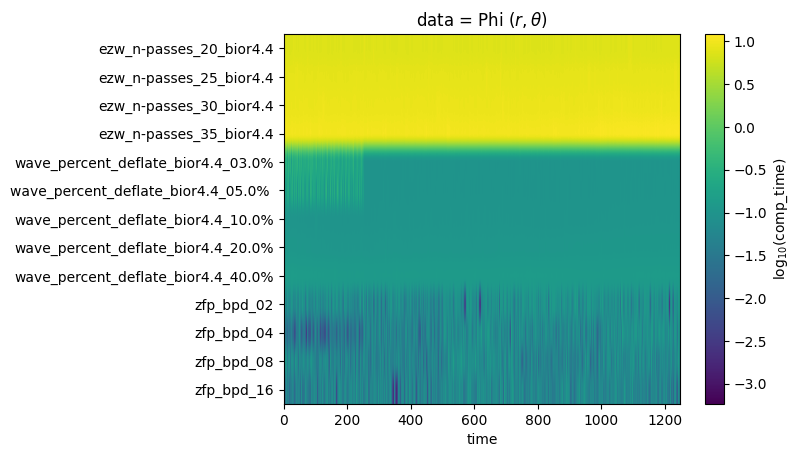

In [56]:
to_plot = np.log10(rth_full_ds.comp_time.values)
fig, ax = plt.subplots(1,1)
im = ax.imshow(to_plot, aspect='auto')
ax.set_title(r'data = Phi $(r, \theta)$')
ax.set_xlabel('time')
ax.set_yticks(range(13)) 
ax.set_yticklabels(rth_full_ds.coords['method'].values)
cbar = fig.colorbar(im)
cbar.set_label(r'$\log_{10}$(comp_time)')  

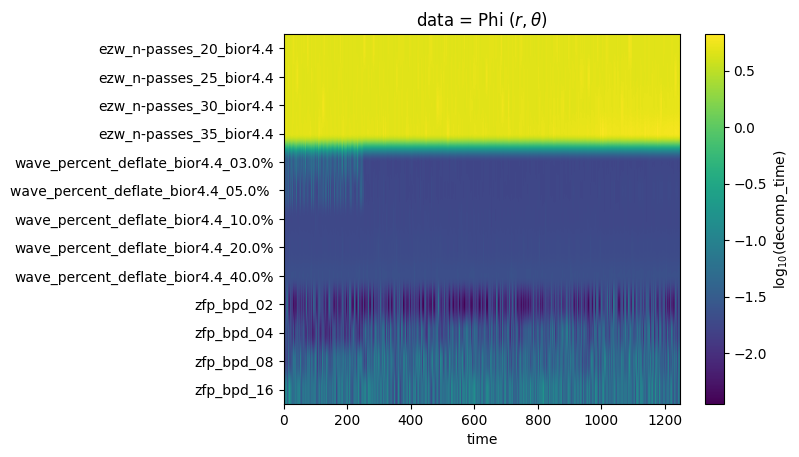

In [57]:
to_plot = np.log10(rth_full_ds.decomp_time.values)
fig, ax = plt.subplots(1,1)
im = ax.imshow(to_plot, aspect='auto')
ax.set_title(r'data = Phi $(r,\theta)$')
ax.set_xlabel('time')
ax.set_yticks(range(13)) 
ax.set_yticklabels(rth_full_ds.coords['method'].values)
cbar = fig.colorbar(im)
cbar.set_label(r'$\log_{10}$(decomp_time)')  

# Analysis of Phi_thphi on the full simulation 

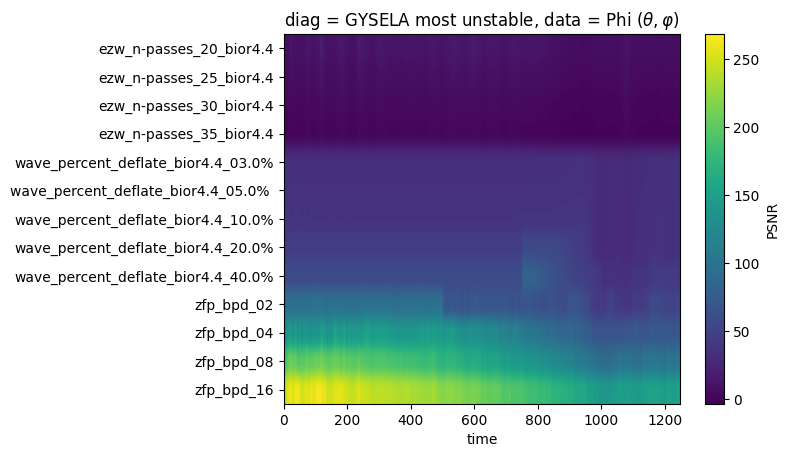

In [58]:
to_plot = thphi_full_ds.psnr.sel(diag='GYSELA_most_unstable').values
fig, ax = plt.subplots(1,1)
im = ax.imshow(to_plot, aspect='auto')
ax.set_title(r'diag = GYSELA most unstable, data = Phi $(\theta,\varphi)$')
ax.set_xlabel('time')
ax.set_yticks(range(13)) 
ax.set_yticklabels(thphi_full_ds.coords['method'].values)
cbar = fig.colorbar(im)
cbar.set_label("PSNR")  

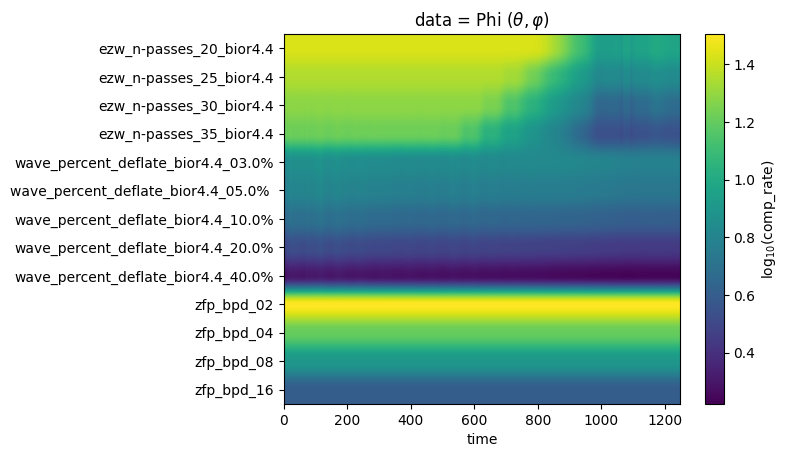

In [59]:
to_plot = np.log10(thphi_full_ds.comp_rate.values)
fig, ax = plt.subplots(1,1)
im = ax.imshow(to_plot, aspect='auto')
ax.set_title(r'data = Phi $(\theta, \varphi)$')
ax.set_xlabel('time')
ax.set_yticks(range(13)) 
ax.set_yticklabels(thphi_full_ds.coords['method'].values)
cbar = fig.colorbar(im)
cbar.set_label(r'$\log_{10}$(comp_rate)')  

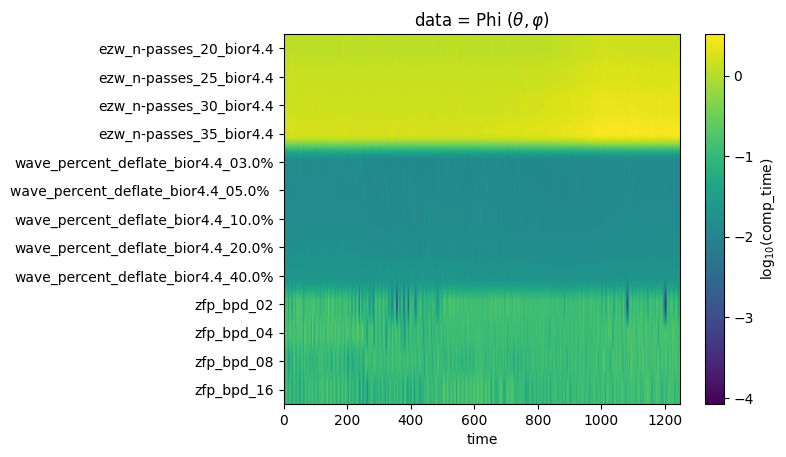

In [60]:
to_plot = np.log10(thphi_full_ds.comp_time.values)
fig, ax = plt.subplots(1,1)
im = ax.imshow(to_plot, aspect='auto')
ax.set_title(r'data = Phi $(\theta, \varphi)$')
ax.set_xlabel('time')
ax.set_yticks(range(13)) 
ax.set_yticklabels(thphi_full_ds.coords['method'].values)
cbar = fig.colorbar(im)
cbar.set_label(r'$\log_{10}$(comp_time)')  

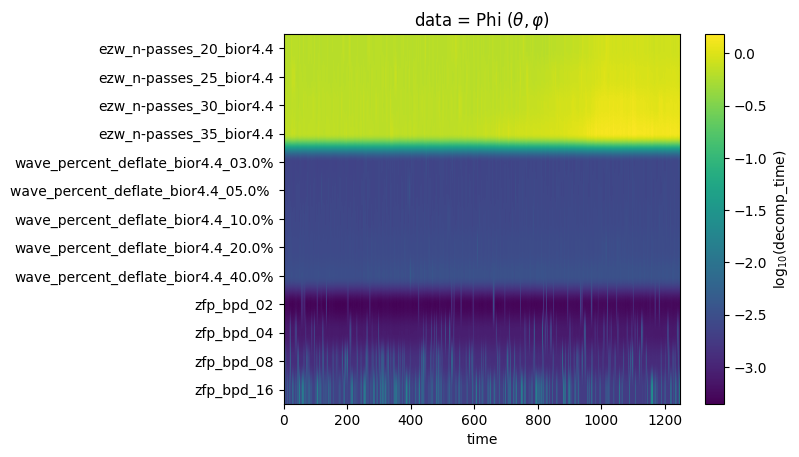

In [61]:
to_plot = np.log10(thphi_full_ds.decomp_time.values)
fig, ax = plt.subplots(1,1)
im = ax.imshow(to_plot, aspect='auto')
ax.set_title(r'data = Phi $(\theta, \varphi)$')
ax.set_xlabel('time')
ax.set_yticks(range(13)) 
ax.set_yticklabels(thphi_full_ds.coords['method'].values)
cbar = fig.colorbar(im)
cbar.set_label(r'$\log_{10}$(decomp_time)')  